In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("cleaned_hotel_booking.csv")

# Verify that the data is loaded correctly
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,is_family
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,False
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,False
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,False
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,False
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,False


In [ ]:
#Booking Trends Analysis
#We will start with Booking Trends Analysis, where we analyze seasonality, peak months, lead time trends, and booking behavior.
#Key Questions to Answer in Booking Trends Analysis
#1️⃣ When are most hotel bookings made? (Seasonality & peak months)
#2️⃣ Are weekend stays more popular than weekday stays?
#3️⃣ How does lead time impact booking trends?
#4️⃣ What are the differences between City Hotels vs. Resort Hotels?

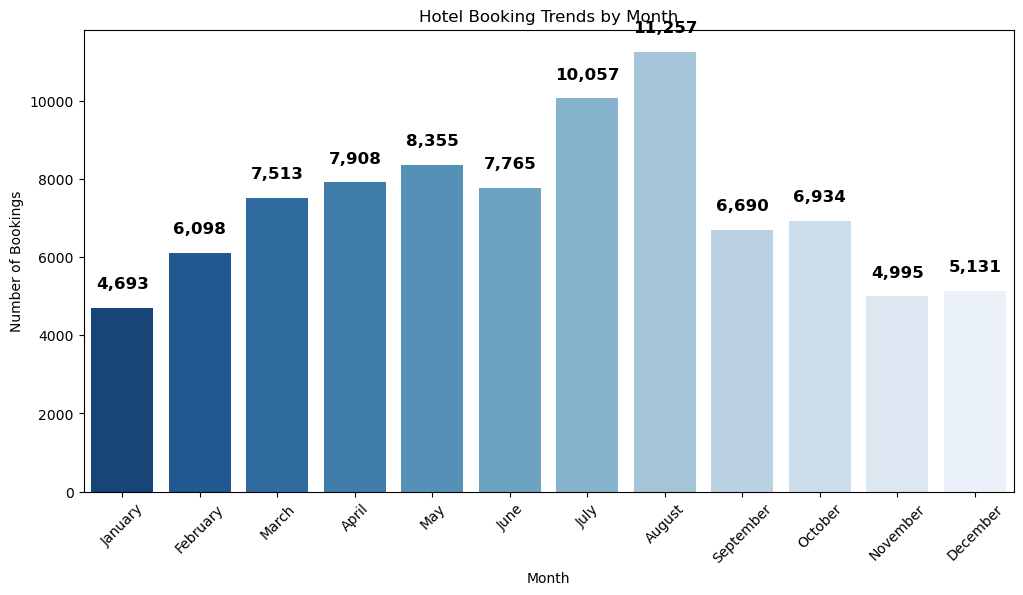

In [35]:
#Analyze Monthly Booking Trends
#We will group the data by arrival months to identify peak booking periods.
#Why?
#To identify high-demand months (seasonal peaks).
#To find off-peak months for potential marketing strategies.

# Convert arrival_date_month to categorical( since it's an object right now)
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'],
                                          categories=['January', 'February', 'March', 'April', 'May', 'June',
                                                      'July', 'August', 'September', 'October', 'November', 'December'],
                                          ordered=True)

# Count the number of bookings per month
monthly_bookings = df['arrival_date_month'].value_counts().sort_index()

# Plot monthly booking trends
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values, palette="Blues_r")

# Add annotations (labels) on top of bars
for i, v in enumerate(monthly_bookings):
    ax.text(i, v + 500, f"{v:,}", ha='center', fontsize=12, fontweight='bold')  # Adds comma formatting

# Set titles and labels
plt.title("Hotel Booking Trends by Month")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)

# Show the plot
plt.show()


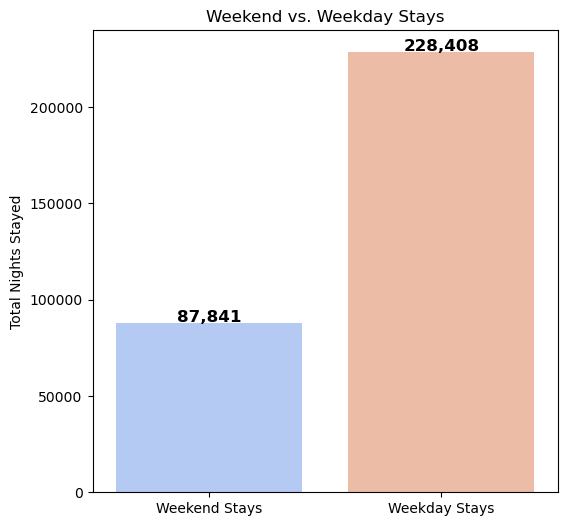

In [34]:
#Weekend vs. Weekday Stay Trends
#We will check if guests prefer weekend stays over weekday stays.
#Why?
#If weekend stays are higher, hotels can adjust pricing accordingly.
#If weekday stays dominate, it may indicate more business travelers.

# Calculate total stays on weekends and weekdays
weekend_stays = df['stays_in_weekend_nights'].sum()
weekday_stays = df['stays_in_week_nights'].sum()

# Plot the results
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=["Weekend Stays", "Weekday Stays"], y=[weekend_stays, weekday_stays], palette="coolwarm")

# Add annotations (labels) on top of bars
for i, v in enumerate([weekend_stays, weekday_stays]):
    ax.text(i, v + 500, f"{v:,}", ha='center', fontsize=12, fontweight='bold')  # Adds comma formatting

# Set titles and labels
plt.title("Weekend vs. Weekday Stays")
plt.ylabel("Total Nights Stayed")

# Show the plot
plt.show()


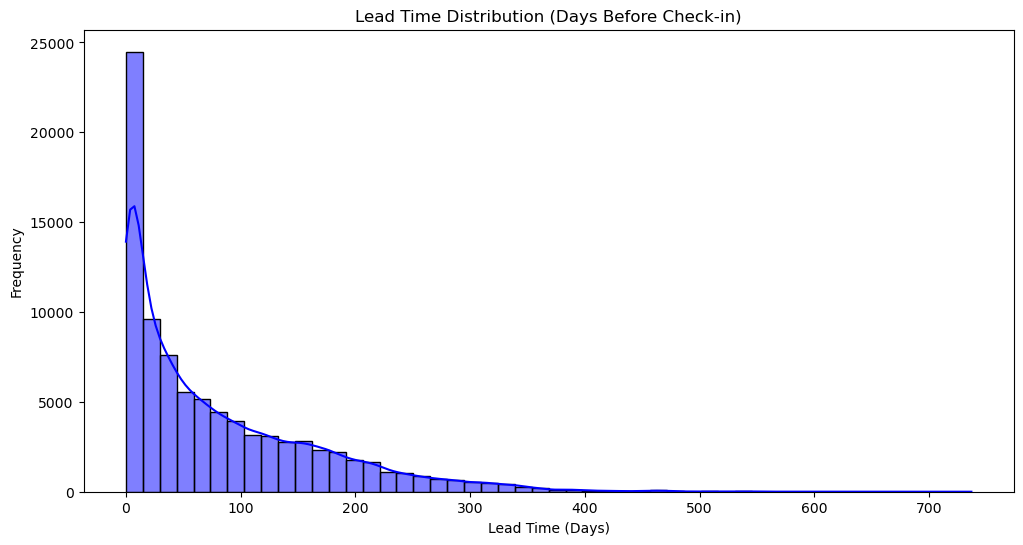

In [5]:
#Lead Time Analysis (How Early Guests Book?)
#We'll analyze the lead time distribution to understand how far in advance customers make bookings.
#Why?
#It helps optimize hotel availability based on early vs. last-minute bookings.
#It identifies patterns in lead time behavior.

# Plot lead time distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['lead_time'], bins=50, kde=True, color='blue')
plt.title("Lead Time Distribution (Days Before Check-in)")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Frequency")
plt.show()

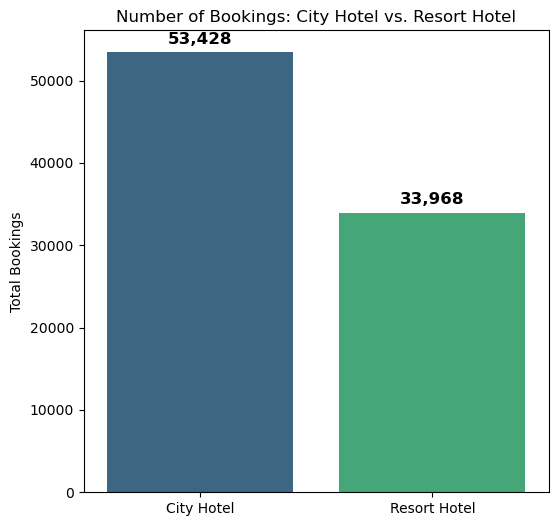

In [33]:
#Booking Trends: City Hotels vs. Resort Hotels
#We compare booking behavior between City Hotels and Resort Hotels.
#Why?
#It helps hotels understand which type of hotel gets more bookings.
#It can guide marketing & pricing strategies based on demand.

# Count bookings by hotel type
hotel_bookings = df['hotel'].value_counts()

# Plot bookings by hotel type
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=hotel_bookings.index, y=hotel_bookings.values, palette="viridis")

# Add annotations (labels) on top of bars
for i, v in enumerate(hotel_bookings):
    ax.text(i, v + 1000, f"{v:,}", ha='center', fontsize=12, fontweight='bold')  # Adds comma formatting

# Set titles and labels
plt.title("Number of Bookings: City Hotel vs. Resort Hotel")
plt.ylabel("Total Bookings")

# Show the plot
plt.show()


In [ ]:
#Revenue Insights Analysis
#we will analyze Revenue Insights, focusing on ADR (Average Daily Rate), total revenue trends, and revenue distribution by hotel type.
#Key Questions to Answer in Revenue Insights
#1️⃣ How does ADR (Average Daily Rate) fluctuate over months?
#2️⃣ Which months generate the highest revenue?
#3️⃣ How do City Hotels compare to Resort Hotels in terms of ADR?
#4️⃣ What are the highest revenue-generating customer segments?

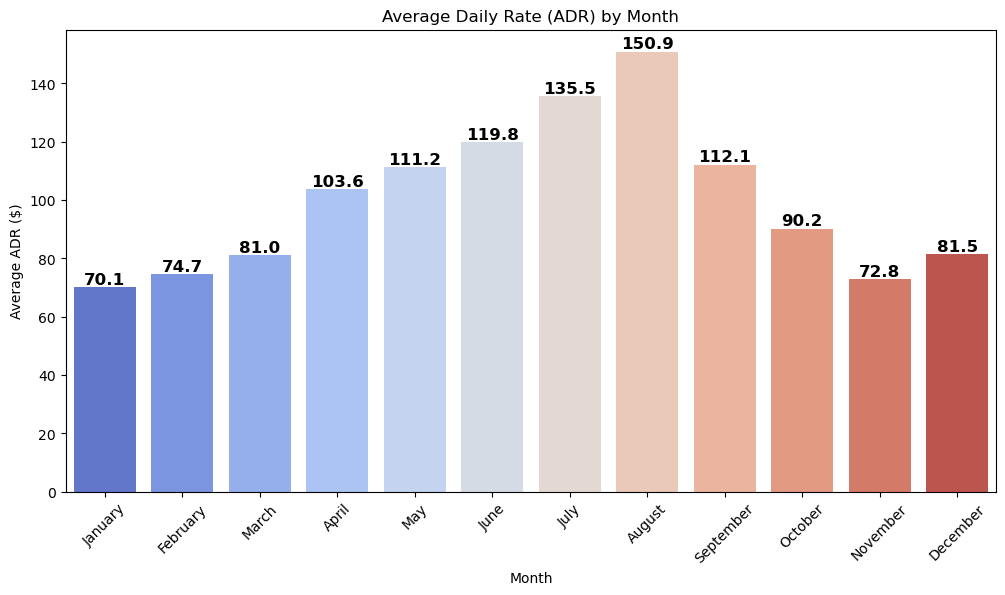

In [20]:
#ADR Trends Over Time
#We will analyze how the Average Daily Rate (ADR) changes across months.
#Why?
#To identify peak pricing months where ADR is highest.
#To observe off-peak months where hotels may lower rates.

# Group by month and calculate average ADR
monthly_adr = df.groupby('arrival_date_month')['adr'].mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December'])

# Plot ADR trends
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=monthly_adr.index, y=monthly_adr.values, palette="coolwarm")

# Add annotations (labels) to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',  # Display ADR value with one decimal point
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Set titles and labels
plt.title("Average Daily Rate (ADR) by Month")
plt.xlabel("Month")
plt.ylabel("Average ADR ($)")
plt.xticks(rotation=45)

# Show the plot
plt.show()

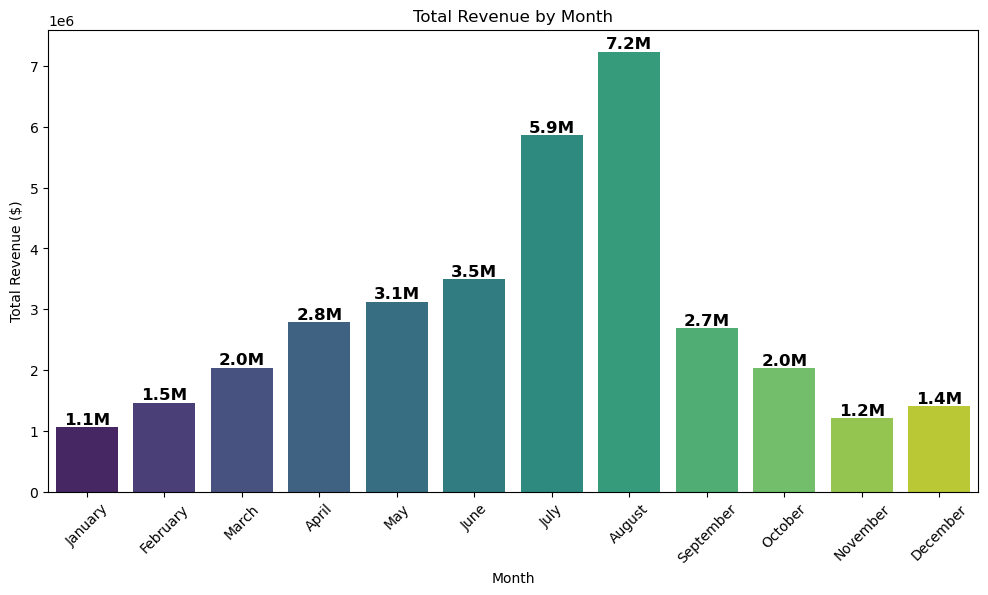

In [16]:
#Total Revenue by Month
#To find which months generate the highest revenue, we calculate total revenue as:
#Revenue = ADR × (stays in week nights + stays in weekend nights)
#Why?
#To find months with the highest total revenue (demand-driven).
#To compare with ADR trends to understand pricing impact.

# Create a new column for total revenue per booking
df['total_revenue'] = df['adr'] * (df['stays_in_week_nights'] + df['stays_in_weekend_nights'])

# Group by month and sum total revenue
monthly_revenue = df.groupby('arrival_date_month')['total_revenue'].sum().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December'])

# Plot total revenue trends
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="viridis")

# Add annotations (labels) to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()/1e6:.1f}M',  # Convert to millions for readability
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Set titles and labels
plt.title("Total Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)

# Show the plot
plt.show()

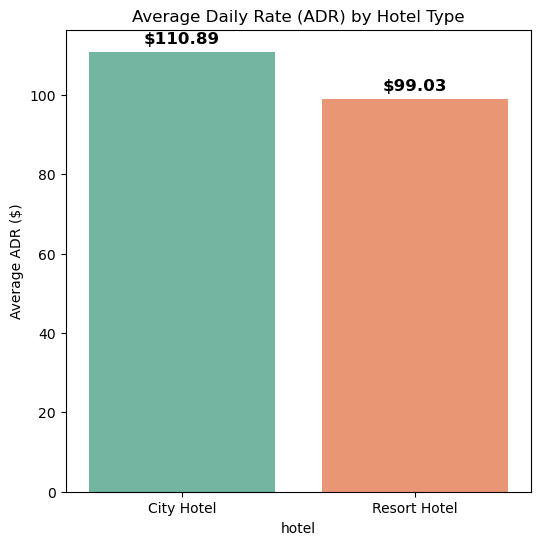

In [32]:
#ADR Comparison: City Hotel vs. Resort Hotel
#We'll analyze how pricing differs between City and Resort Hotels.
#Why?
#To identify which hotel type has higher pricing power.
#It helps hotels adjust pricing strategies based on demand.

# Group by hotel type and calculate ADR
hotel_adr = df.groupby('hotel')['adr'].mean()

# Plot ADR comparison
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=hotel_adr.index, y=hotel_adr.values, palette="Set2")

# Add annotations (labels) on top of bars
for i, v in enumerate(hotel_adr):
    ax.text(i, v + 2, f"${v:.2f}", ha='center', fontsize=12, fontweight='bold')

# Set titles and labels
plt.title("Average Daily Rate (ADR) by Hotel Type")
plt.ylabel("Average ADR ($)")

# Show the plot
plt.show()


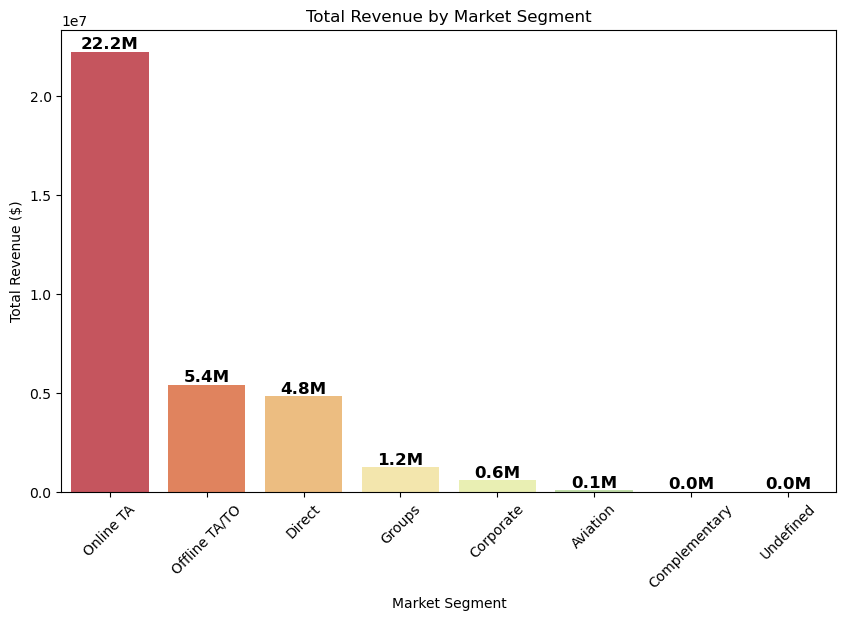

In [18]:
#Revenue by Customer Segment
#To find which customer segments generate the most revenue.
#Why?
#To identify high-value customer segments (e.g., Direct bookings vs. Online Travel Agents).
#It helps optimize marketing strategies for profitability.

# Group by market segment and sum total revenue
segment_revenue = df.groupby('market_segment')['total_revenue'].sum().sort_values(ascending=False)

# Plot revenue distribution by market segment
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=segment_revenue.index, y=segment_revenue.values, palette="Spectral")

# Add annotations (labels) to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()/1e6:.1f}M',  # Convert to millions for readability
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Set titles and labels
plt.title("Total Revenue by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
#Cancellation Analysis
#we will analyze Cancellations to understand why and when bookings are canceled.
#Key Questions to Answer in Cancellation Analysis
#1️⃣ What is the overall cancellation rate?
#2️⃣ Are cancellations higher for City Hotels or Resort Hotels?
#3️⃣ How does lead time impact cancellations?
#4️⃣ Are cancellations affected by booking month or seasonality?
#5️⃣ Which customer segments have the highest cancellation rates?

In [21]:
#Calculate Overall Cancellation Rate
#We will calculate the percentage of bookings that were canceled.
#Why?
#If the cancellation rate is high, hotels might need stricter deposit policies or flexible booking options.

# Calculate cancellation rate
cancellation_rate = df['is_canceled'].mean() * 100
print(f"Overall Cancellation Rate: {cancellation_rate:.2f}%")

Overall Cancellation Rate: 27.49%


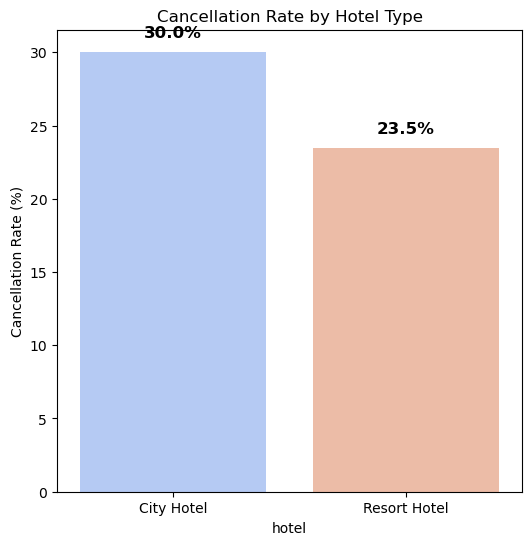

In [22]:
#Cancellation Rate: City Hotels vs. Resort Hotels
#Now, we compare cancellations between City Hotels and Resort Hotels.
#Why?
#If City Hotels have a higher cancellation rate, they may attract more business travelers who change plans frequently.
#If Resort Hotels have higher cancellations, it may be due to vacation plans being more flexible.

# Group by hotel type and calculate cancellation rate
hotel_cancellation = df.groupby('hotel')['is_canceled'].mean() * 100

# Plot cancellation rate by hotel type
plt.figure(figsize=(6, 6))
sns.barplot(x=hotel_cancellation.index, y=hotel_cancellation.values, palette="coolwarm")
plt.title("Cancellation Rate by Hotel Type")
plt.ylabel("Cancellation Rate (%)")

# Add annotations
for i, v in enumerate(hotel_cancellation):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.show()

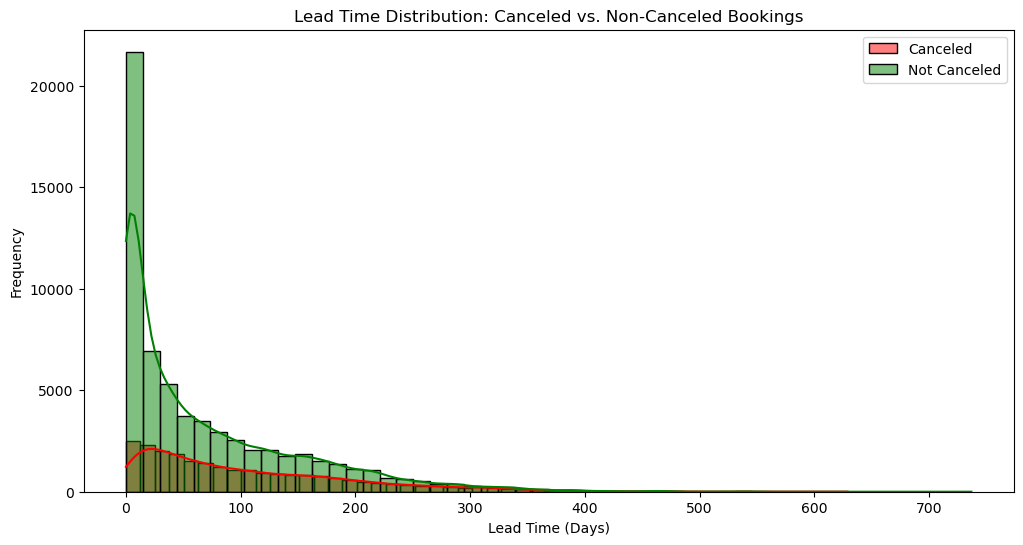

In [23]:
#Lead Time vs. Cancellations
#We analyze whether longer lead times lead to higher cancellation rates.
#Why?
#If long lead times have higher cancellations, customers may book far in advance and cancel later.
#Short-term bookings might have lower cancellations due to more certainty.

# Plot lead time distribution for canceled vs. non-canceled bookings
plt.figure(figsize=(12, 6))
sns.histplot(df[df['is_canceled'] == 1]['lead_time'], bins=50, kde=True, color='red', label="Canceled")
sns.histplot(df[df['is_canceled'] == 0]['lead_time'], bins=50, kde=True, color='green', label="Not Canceled")
plt.legend()
plt.title("Lead Time Distribution: Canceled vs. Non-Canceled Bookings")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Frequency")
plt.show()

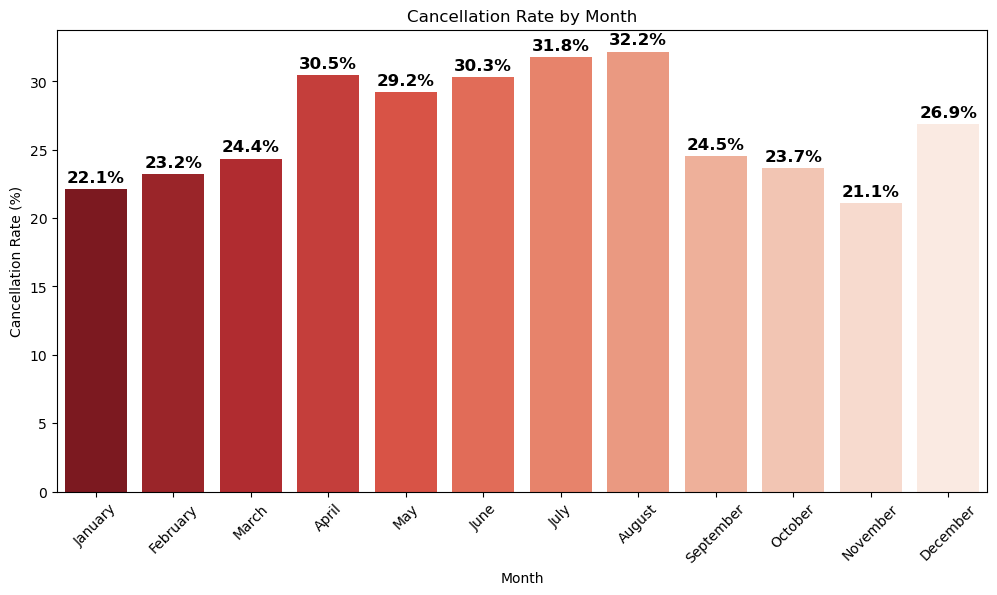

In [24]:
#Cancellations by Month (Seasonality Impact)
#We analyze how cancellations vary by month.
#Why?
#If summer months have higher cancellations, guests might cancel due to travel plan changes.
#If off-season months have lower cancellations, it might indicate more committed bookings.

# Group by month and calculate cancellation rate
monthly_cancellation = df.groupby('arrival_date_month')['is_canceled'].mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December']) * 100

# Plot monthly cancellation rate
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=monthly_cancellation.index, y=monthly_cancellation.values, palette="Reds_r")
plt.title("Cancellation Rate by Month")
plt.xlabel("Month")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(rotation=45)

# Add annotations
for i, v in enumerate(monthly_cancellation):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.show()

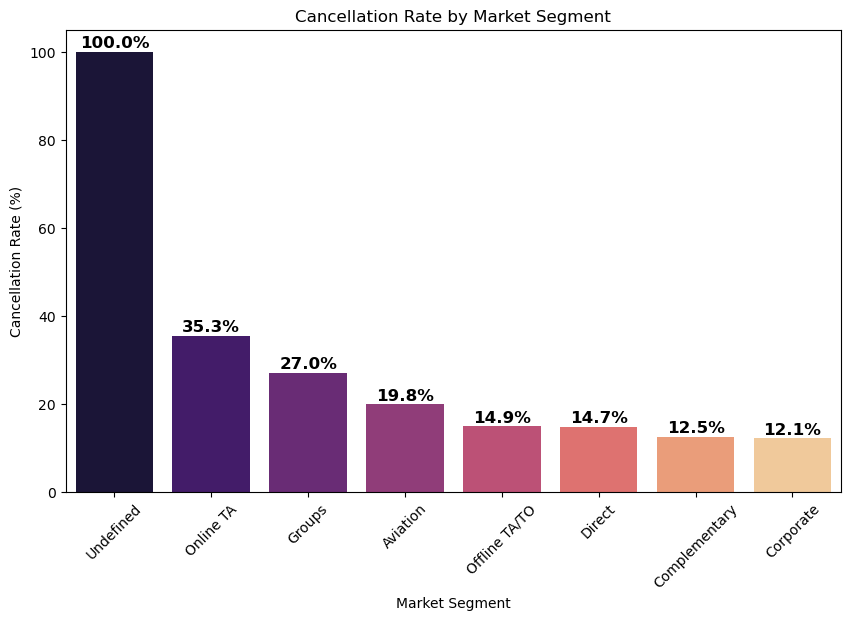

In [25]:
#Cancellations by Customer Segment
#Lets see which customer types cancel the most.
#Why?
#If Online Travel Agents (OTA) have a high cancellation rate, it might indicate less customer commitment.
#Direct bookings may have lower cancellations, suggesting stronger loyalty.

# Group by market segment and calculate cancellation rate
segment_cancellation = df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False) * 100

# Plot cancellation rate by market segment
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=segment_cancellation.index, y=segment_cancellation.values, palette="magma")

plt.title("Cancellation Rate by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(rotation=45)

# Add annotations
for i, v in enumerate(segment_cancellation):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.show()

In [26]:
#Customer Segmentation Analysis
#we will focus on Customer Segmentation to understand different types of hotel guests and their behavior.
#Key Questions to Answer in Customer Segmentation
#1️⃣ What are the different customer segments based on booking patterns?
#2️⃣ Which customer type contributes the most to revenue?
#3️⃣ Are certain customers more likely to cancel their bookings?
#4️⃣ How do different customer types vary in stay duration, ADR, and booking trends?

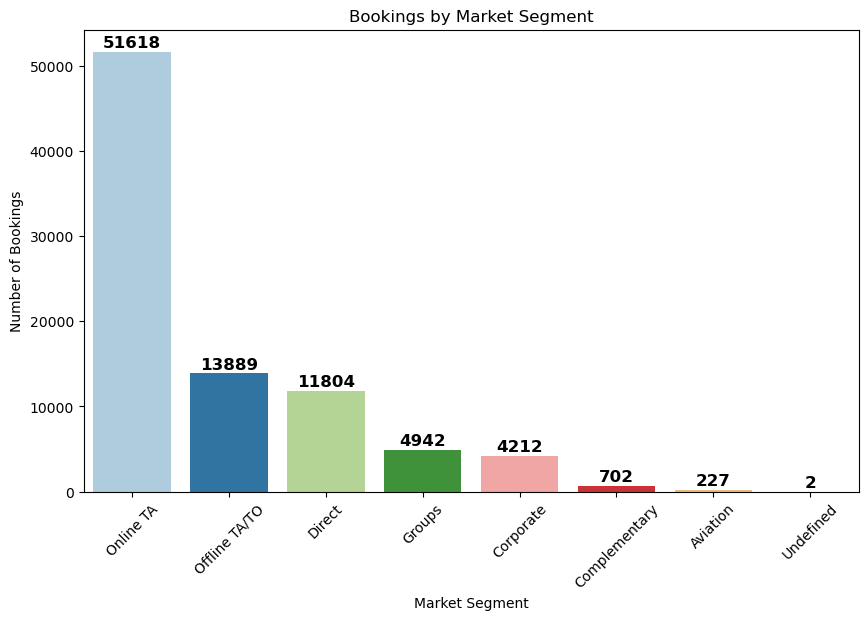

In [28]:
#Customer Segmentation by Market Segment
#We will first analyze bookings by market segment.
#Why?
#It helps identify the most common booking channels (Direct, Online Travel Agents, Corporate, etc.).
#It is useful for targeting the right customer groups with promotions.

# Count bookings per market segment
market_segment_counts = df['market_segment'].value_counts()

# Plot market segment distribution
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=market_segment_counts.index, y=market_segment_counts.values, palette="Paired")

plt.title("Bookings by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)

# Add annotations
for i, v in enumerate(market_segment_counts):
    plt.text(i, v + 500, f"{v}", ha='center', fontsize=12, fontweight='bold')

plt.show()

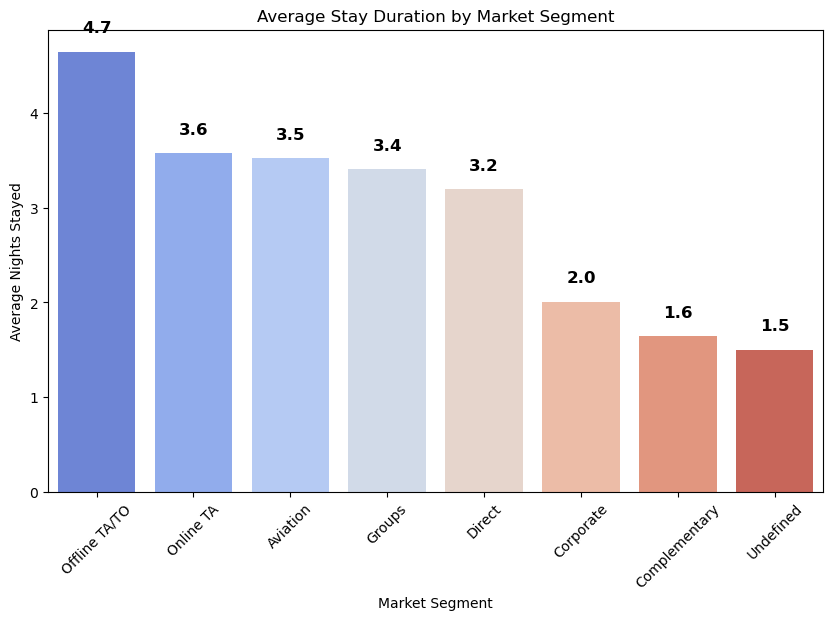

In [30]:
#Average Stay Duration by Customer Segment
#To understand which customers stay longer, we analyze average total nights stayed per segment.
#Why?
#It identifies long-staying customers (useful for loyalty programs).
#It helps adjust pricing strategies for long vs. short stays.

# Calculate average total nights per segment
segment_stay = df.groupby('market_segment')['total_nights'].mean().sort_values(ascending=False)

# Plot stay duration by market segment
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=segment_stay.index, y=segment_stay.values, palette="coolwarm")

plt.title("Average Stay Duration by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Average Nights Stayed")
plt.xticks(rotation=45)

# Add annotations
for i, v in enumerate(segment_stay):
    plt.text(i, v + 0.2, f"{v:.1f}", ha='center', fontsize=12, fontweight='bold')

plt.show()